# Relatório do Processamento de Consulta

### Alunos:

- Alexandre Luis Ribeiro Martins
- Diego Santos Gonçalves
- Gabriel Arrighi Silva

In [1]:
from query.processing import QueryRunner

QueryRunner.main()

Existe o doc? index.hasDocId(105047)
Precomputando valores atraves do indice...


  0%|          | 8/786915 [00:00<4:00:19, 54.57it/s]

Precomputou valores done in 1.782525


100%|██████████| 786915/786915 [01:58<00:00, 6648.97it/s]


Finalizando consultas. :)


#### Análise a ocorrência de termos no documento fazendo, no mínimo:

 - Quais são os 10 termos com maior e menor IDF da coleção? Com base nos termos de menor IDF, será que podiamos propor stopwords novas? Com base nesses termos, existe algo que você poderia melhorar no processamento?


In [3]:
from query.ranking_models import IndexPreComputedVals

IndexPreComputedVals.print_top_idf()

Top 10 melhores idf:
1: (15.908181492953341, '��\u200f')
2: (15.908181492953341, '�c�û�û‹o‹ì+ëra‹å‰.–�œ�˜�a�‰v¸�vuÿv�')
3: (15.908181492953341, '�')
4: (15.908181492953341, '￥88,54')
5: (15.908181492953341, '￥360,00')
6: (15.908181492953341, '￥297,26')
7: (15.908181492953341, '￥236,79')
8: (15.908181492953341, '￥225,82')
9: (15.908181492953341, '￥144,15')
10: (15.908181492953341, '￥122,78')
Top 10 piores idf:
1: (0.061760655179727016, 'de')
2: (0.19519781167858183, 'da')
3: (0.34752026802547564, 'do')
4: (0.3715700063275667, 'uma')
5: (0.37494302713755256, 'com')
6: (0.3827218577739812, 'categoria')
7: (0.5331420616064177, 'em')
8: (0.5478830663352967, 'o')
9: (0.5934920471228493, 'um')
10: (0.5981013003754387, 'por')


#### Resposta:

 - #### Sim, poderiamos remover mais stopwords como 'de', 'da', 'do', 'uma', etc.

 - #### Sim, existe algo que poderiamos melhorar no processamento, como o tratamento de caracteres especiais inesperados e tratamento de unidades de medidas, como no caso das unidades monetárias.

- Apresente o gráfico de frequência das palavras. Tais palavras devem ser ordenadas decrescentemente de acordo com a sua frequência e devem ser todas representadas no eixo x. Note que a frequencia da palavra é a frequência total do termo na coleção (definido por F(termo) na aula sobre TF-IDF). De forma similar, faça o gráfico do IDF de cada palavra (veja o grafico similar na aula sobre TF-IDF). Mostra também, quais tipos de palavras (específicas? Erros de processamento?) possuem TF alto, mediano e baixo. Faça o mesmo para IDF. Note que esse grafico deve conter todas as palavras. Não é necessário apresentar todos os valores do eixo x (palavras), pois, ficaria difícil de visualizar. 

#### Term Frequency (TF)

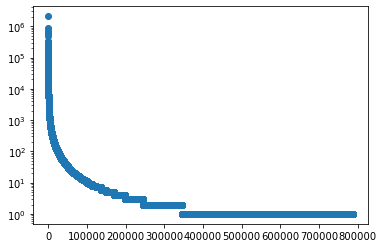

In [4]:
IndexPreComputedVals.plot_terms_freq()

In [5]:
IndexPreComputedVals.term_freq_list[:10]

[(2099982, 'de'),
 (874841, 'o'),
 (687745, 'do'),
 (632021, 'da'),
 (592431, 'semi'),
 (592166, 'em'),
 (493177, 'que'),
 (327682, 'com'),
 (309493, 'um'),
 (307357, 'uma')]

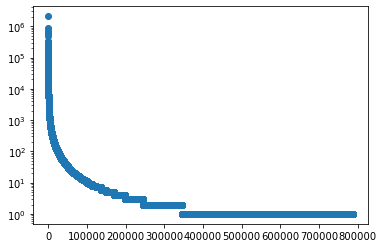

In [6]:
import matplotlib.pyplot as plt
import math

x = [i for i in range(len(IndexPreComputedVals.term_freq_list))]
y = [freq for freq, _ in IndexPreComputedVals.term_freq_list]
_, ax = plt.subplots()

ax.scatter(x, y)
ax.set_yscale('log')

plt.show()


In [7]:
from query.ranking_models import VectorRankingModel

tf = [(VectorRankingModel.tf(freq_term), term) for freq_term, term in IndexPreComputedVals.term_freq_list]

#### Resposta
Abaixo estão apresentados os 10 maiores TF, os 10 menores TF e os 10 TF medianos (considerando que 20 é o valor máximo, a mediana vai estar por volta do valor 10)

In [8]:
tf[:10]

[(22.00194553120508, 'de'),
 (20.73866130926108, 'o'),
 (20.391514220426608, 'do'),
 (20.269612969694453, 'da'),
 (20.17628760860869, 'semi'),
 (20.175642133071925, 'em'),
 (19.91174599364295, 'que'),
 (19.321936900372215, 'com'),
 (19.23954725389415, 'um'),
 (19.229555816999518, 'uma')]

In [9]:
tf[-10:]

[(1.0, '++max'),
 (1.0, '++gp'),
 (1.0, "'t"),
 (1.0, "'patafisica"),
 (1.0, "'d"),
 (1.0, "'=f'+g"),
 (1.0, "'=c.f"),
 (1.0, "'="),
 (1.0, "'87\xad'93"),
 (1.0, "'66\xad'67")]

In [10]:
mid = 0

for i, (x, _) in enumerate(tf):
    if x <= 10:
        mid = i
        break

tf[mid:mid+10]

[(10.0, 'visitas'),
 (10.0, 'serio'),
 (10.0, 'seriado'),
 (10.0, 'privilegios'),
 (10.0, 'optica'),
 (10.0, 'misterio'),
 (10.0, 'liberalismo'),
 (10.0, 'corta'),
 (10.0, 'concedeu'),
 (10.0, 'acompanhar')]

Ao analisar esses TF, temos que:
- TF altos são geralmente conectivos
- TF baixos são geralmente erros ou termo de contextos muito específicos
- TF médios são geralmente adjetivos, substantivos ou verbos

#### Inverse Document Frequency (IDF)

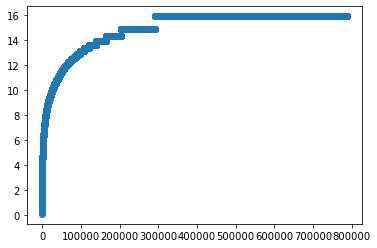

In [11]:
x = [i for i in range(len(VectorRankingModel.idf_list))]
y = [i for i,_ in VectorRankingModel.idf_list]

_, ax = plt.subplots()

ax.scatter(x, y)
#ax.set_xscale('log')

plt.show()

#### Resposta
Abaixo estão apresentados os 10 maiores IDF, os 10 menores IDF e os 10 IDF medianos (considerando que agora 16 é o valor máximo de IDF, a mediana vai estar por volta do valor 8 )

In [13]:
idf = VectorRankingModel.idf_list

In [16]:
idf[-10:]

[(15.908181492953341, '￥122,78'),
 (15.908181492953341, '￥144,15'),
 (15.908181492953341, '￥225,82'),
 (15.908181492953341, '￥236,79'),
 (15.908181492953341, '￥297,26'),
 (15.908181492953341, '￥360,00'),
 (15.908181492953341, '￥88,54'),
 (15.908181492953341, '�'),
 (15.908181492953341, '�c�û�û‹o‹ì+ëra‹å‰.–�œ�˜�a�‰v¸�vuÿv�'),
 (15.908181492953341, '��\u200f')]

In [17]:
idf[:10]

[(0.061760655179727016, 'de'),
 (0.19519781167858183, 'da'),
 (0.34752026802547564, 'do'),
 (0.3715700063275667, 'uma'),
 (0.37494302713755256, 'com'),
 (0.3827218577739812, 'categoria'),
 (0.5331420616064177, 'em'),
 (0.5478830663352967, 'o'),
 (0.5934920471228493, 'um'),
 (0.5981013003754387, 'por')]

In [20]:
mid = 0

for i, (x, _) in enumerate(idf):
    if x >= 8:
        mid = i
        break

idf[mid:mid+10]

[(8.001290897344825, '2°'),
 (8.001290897344825, 'actualidade'),
 (8.001290897344825, 'adao'),
 (8.001290897344825, 'agenda'),
 (8.001290897344825, 'analogia'),
 (8.001290897344825, 'biblico'),
 (8.001290897344825, 'capturados'),
 (8.001290897344825, 'cartoes'),
 (8.001290897344825, 'cedro'),
 (8.001290897344825, 'chamaram')]

Neste caso, como esperado, temos uma relação inversa de valores do TF. Deste modo, temos que:
- IDF altos representam termos com maior especifidade de uso, tal qual valores monetários japoneses, ou erros de escrita ou de processamento.
- IDF baixos podem ser considerados Stopwords como artigos e conectivos.
- OS IDF medianos, como no TF, normalmente representam substantivos, adjetivos e verbos.

#### Faça algumas consultas exemplos, mostrando o tempo de execução e o número de documentos retornados para cada consulta e para cada modelo implementado

- Consultas realizadas:
  - Dom Joaquim
  - Serra do Cipó
  - Nova York
  
##### Modelo Booleano - AND


In [14]:
from query.processing import QueryRunner
QueryRunner.main()

Existe o doc? index.hasDocId(105047)
Precomputando valores atraves do indice...


  0%|          | 8/786915 [00:00<3:51:18, 56.70it/s]

Precomputou valores done in 1.997806


100%|██████████| 786915/786915 [02:02<00:00, 6413.83it/s]


Fazendo query de 'Dom Joaquim'...
Query Creation done in 6.405563
anwered with 299 docs done in 0.16221
Top 10 melhores respostas:
1: 35331
2: 37379
3: 111620
4: 33798
5: 36359
6: 11272
7: 30218
8: 44043
9: 34828
10: 37388


Top 10 piores respostas
1: 103935
2: 33788
3: 106995
4: 68089
5: 1528
6: 37879
7: 33781
8: 33779
9: 33265
10: 32755
Fazendo query de 'Serra do Cipó'...
Query Creation done in 2.006126
anwered with 44 docs done in 0.206998
Top 10 melhores respostas:
1: 32642
2: 73478
3: 35335
4: 66318
5: 32786
6: 11284
7: 15384
8: 1178
9: 33186
10: 13475


Top 10 piores respostas
1: 25983
2: 32636
3: 29818
4: 36728
5: 32624
6: 30319
7: 32363
8: 32235
9: 31081
10: 5220
Fazendo query de 'Nova York'...
Query Creation done in 6.502272
anwered with 1251 docs done in 0.050638
Top 10 melhores respostas:
1: 57380
2: 57382
3: 57384
4: 65588
5: 24635
6: 114766
7: 57425
8: 106581
9: 122997
10: 65655


Top 10 piores respostas
1: 131066
2: 32755
3: 57306
4: 106455
5: 57303
6: 73685
7: 40910
8: 5

##### Modelo Booleano - OR


In [15]:
QueryRunner.main()

Existe o doc? index.hasDocId(105047)
Precomputando valores atraves do indice...


  0%|          | 0/786915 [00:00<?, ?it/s]

Precomputou valores done in 2.245089


100%|██████████| 786915/786915 [02:06<00:00, 6240.37it/s]


Fazendo query de 'Dom Joaquim'...
Query Creation done in 3.238425
anwered with 3000 docs done in 0.015727
Top 10 melhores respostas:
1: 49154
2: 32772
3: 32773
4: 49159
5: 32777
6: 32778
7: 122889
8: 32783
9: 16402
10: 24596


Top 10 piores respostas
1: 32767
2: 57341
3: 73722
4: 32757
5: 32755
6: 24563
7: 32753
8: 32747
9: 24560
10: 24559
Fazendo query de 'Serra do Cipó'...
Query Creation done in 3.356434
anwered with 48389 docs done in 0.199677
Top 10 melhores respostas:
1: 131073
2: 131074
3: 131076
4: 131085
5: 131089
6: 131093
7: 131098
8: 131099
9: 131101
10: 131111


Top 10 piores respostas
1: 131071
2: 131068
3: 131066
4: 131063
5: 131060
6: 131053
7: 131046
8: 131040
9: 131037
10: 131036
Fazendo query de 'Nova York'...
Query Creation done in 3.690385
anwered with 11586 docs done in 0.052266
Top 10 melhores respostas:
1: 32768
2: 32769
3: 131073
4: 32783
5: 32784
6: 32785
7: 32786
8: 98324
9: 32789
10: 65558


Top 10 piores respostas
1: 32767
2: 32765
3: 65531
4: 131066
5: 3276

##### Modelo Vetorial



In [17]:
QueryRunner.main()


Existe o doc? index.hasDocId(105047)
Precomputando valores atraves do indice...


  0%|          | 8/786915 [00:00<4:16:07, 51.21it/s]

Precomputou valores done in 2.064047


100%|██████████| 786915/786915 [02:05<00:00, 6263.24it/s]


Fazendo query de 'Dom Joaquim'...
Query Creation done in 2.037439
anwered with 3000 docs done in 0.022927
Top 10 melhores respostas:
1: 32237
2: 32682
3: 119748
4: 32235
5: 33222
6: 113490
7: 34008
8: 124343
9: 73217
10: 123480


Top 10 piores respostas
1: 45832
2: 54962
3: 19558
4: 132785
5: 8041
6: 2638
7: 83216
8: 5220
9: 43735
10: 30714
Fazendo query de 'Serra do Cipó'...
Query Creation done in 1.834098
anwered with 48389 docs done in 0.357116
Top 10 melhores respostas:
1: 33969
2: 33529
3: 32235
4: 32363
5: 126940
6: 30211
7: 30418
8: 73478
9: 33513
10: 114679


Top 10 piores respostas
1: 71518
2: 124024
3: 13706
4: 61660
5: 108035
6: 123620
7: 83261
8: 115472
9: 106439
10: 7332
Fazendo query de 'Nova York'...
Query Creation done in 1.755674
anwered with 11586 docs done in 0.097682
Top 10 melhores respostas:
1: 126978
2: 100187
3: 42958
4: 100194
5: 122997
6: 129185
7: 132770
8: 81849
9: 81839
10: 58241


Top 10 piores respostas
1: 88589
2: 134498
3: 96428
4: 101785
5: 109277
6: 9

#### Apresentação e discussão dos gráficos de avaliação (precisão e revocação @5, @10, @25, @50) do modelo vetorial
- Consultas realizadas com os documentos relevantes já coletados:
  - Irlanda
  - Belo Horizonte
  - São Paulo

Existe o doc? index.hasDocId(105047)
Precomputando valores atraves do indice...


  0%|          | 0/786915 [00:00<?, ?it/s]

Precomputou valores done in 2.336143


100%|██████████| 786915/786915 [03:20<00:00, 3932.59it/s]


Fazendo query de 'Irlanda'...
Query Creation done in 1.406791
anwered with 766 docs done in 0.036712
Precisao @5: 0.2
Recall @5: 0.006896551724137931
Precisao @10: 0.2
Recall @10: 0.013793103448275862
Precisao @25: 0.36
Recall @25: 0.06206896551724138
Precisao @50: 0.42
Recall @50: 0.14482758620689656


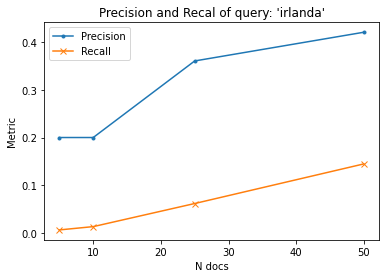

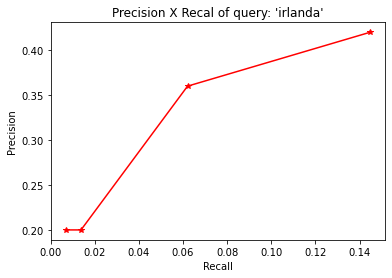

Top 10 melhores respostas:
1: 40089
2: 39300
3: 53322
4: 35401
5: 11696
6: 43033
7: 131369
8: 58189
9: 63292
10: 115901


Top 10 piores respostas
1: 101785
2: 47637
3: 41801
4: 108451
5: 29856
6: 117527
7: 100480
8: 24884
9: 338
10: 59577
Fazendo query de 'Belo Horizonte'...
Query Creation done in 1.951214
anwered with 1947 docs done in 0.017369
Precisao @5: 0.0
Recall @5: 0.0
Precisao @10: 0.1
Recall @10: 0.012658227848101266
Precisao @25: 0.12
Recall @25: 0.0379746835443038
Precisao @50: 0.12
Recall @50: 0.0759493670886076


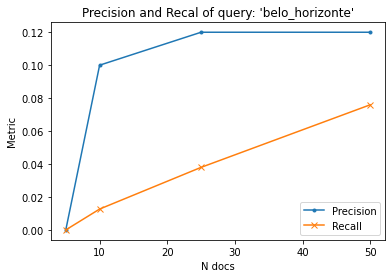

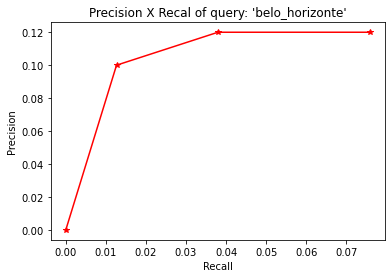

Top 10 melhores respostas:
1: 91853
2: 93107
3: 91856
4: 32118
5: 32436
6: 107302
7: 105795
8: 32682
9: 32269
10: 9931


Top 10 piores respostas
1: 129883
2: 103158
3: 97042
4: 57536
5: 67161
6: 12060
7: 56400
8: 117527
9: 49654
10: 24618
Fazendo query de 'São Paulo'...
Query Creation done in 1.76268
anwered with 26519 docs done in 0.182125
Precisao @5: 0.0
Recall @5: 0.0
Precisao @10: 0.3
Recall @10: 0.005454545454545455
Precisao @25: 0.24
Recall @25: 0.01090909090909091
Precisao @50: 0.3
Recall @50: 0.02727272727272727


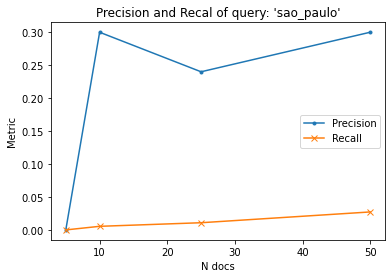

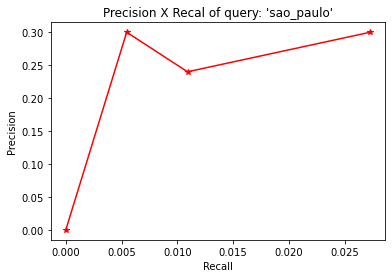

Top 10 melhores respostas:
1: 73731
2: 63160
3: 73702
4: 73605
5: 24070
6: 55480
7: 61441
8: 24734
9: 18489
10: 45081


Top 10 piores respostas
1: 18588
2: 59158
3: 119216
4: 43735
5: 133178
6: 65517
7: 58210
8: 682
9: 107230
10: 124266
Finalizando consultas. :)


In [1]:
from query.processing import QueryRunner

QueryRunner.main()

#### Análise dos gráficos gerados
Analisando os gráficos é possível perceber que, para todas as consultas realizadas, obteve-se uma baixa precisão e revocação com os documentos relevantes utilizados na pesquisa. A precisão teve melhores resultados do que a revocação e a melhor consulta feita foi para a query "irlanda".

Isso pode nos indicar duas possibilidades. A primeira é que o algoritmo utilizado para o Modelo Vetorial necessita de melhorias para aumentar o valor dessas métricas. A outra possibilidade é que o problema possa estar no algoritmo utilizado para busca dos documentos relevantes não estar, sendo que este possa não ter sido utilizado de forma adequada.